In [1]:
!pip3 install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\mainakd\appdata\local\programs\python\python37\lib\site-packages (0.21.3)


In [5]:
import sklearn
import numpy as np
import pandas as pd
from pprint import pprint as pp

In [8]:
pp(sklearn.__version__)
pp(np.__version__)
pp(pd.__version__)

'0.21.3'
'1.17.4'
'0.25.3'


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv(r"C:\Users\mainakd\Documents\AKshayTask\nlp\machine_learning_self_study_udemy\model\datasets\boston_data.csv")

In [13]:
pp(df.columns)

Index(['ID', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')


In [14]:
pp(df.head())

   ID  indus  chas    nox     rm   age     dis  rad  tax  ptratio  lstat  medv
0   1   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   4.98  24.0
1   2   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   9.14  21.6
2   4   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   2.94  33.4
3   5   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   5.33  36.2
4   7   7.87     0  0.524  6.012  66.6  5.5605    5  311     15.2  12.43  22.9


In [19]:
# shape showed you how many records you have to work.
pp(df.shape) 


(333, 12)


In [18]:
# Info give you quick overview of the data.
pp(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 12 columns):
ID         333 non-null int64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(8), int64(4)
memory usage: 31.3 KB
None


In [20]:
# Describe gives you quick statistical overview
pp(df.describe())

               ID       indus        chas         nox          rm         age  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean   250.951952   11.293483    0.060060    0.557144    6.265619   68.226426   
std    147.859438    6.998123    0.237956    0.114955    0.703952   28.133344   
min      1.000000    0.740000    0.000000    0.385000    3.561000    6.000000   
25%    123.000000    5.130000    0.000000    0.453000    5.884000   45.400000   
50%    244.000000    9.900000    0.000000    0.538000    6.202000   76.700000   
75%    377.000000   18.100000    0.000000    0.631000    6.595000   93.800000   
max    506.000000   27.740000    1.000000    0.871000    8.725000  100.000000   

              dis         rad         tax     ptratio       lstat        medv  
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000  
mean     3.709934    9.633634  409.279279   18.448048   12.515435   22.768769  
std      1.981123    8.742174 

Text(1.6749999999999972, 0.5, 'median value of owner-occupied homes in $1000s.')

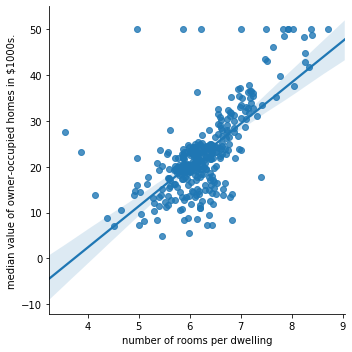

In [21]:
# plot between number of rooms for dwelling and the median value
# lmplot in seaborn library gives you scatter plot representation and also try and fit the linear model
sns.lmplot('rm', 'medv', df)
plt.xlabel("number of rooms per dwelling")
plt.ylabel("median value of owner-occupied homes in $1000s.")

Text(10.049999999999997, 0.5, 'median value of owner-occupied homes in $1000s.')

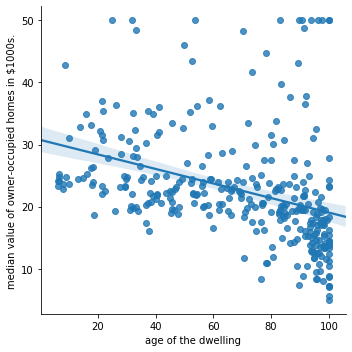

In [22]:
sns.lmplot('age', 'medv', df)
plt.xlabel("age of the dwelling")
plt.ylabel("median value of owner-occupied homes in $1000s.")
## This is the negative relationship, older room has lower value.

Text(10.049999999999997, 0.5, 'median value of owner-occupied homes in $1000s.')

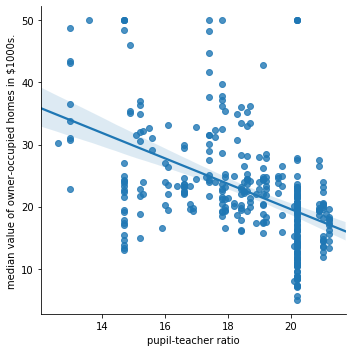

In [23]:
sns.lmplot('ptratio', 'medv', df)
plt.xlabel("pupil-teacher ratio")
plt.ylabel("median value of owner-occupied homes in $1000s.")
## Number of pupil-teacher is less home price is high 

In [25]:
## Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [33]:
X = df.drop('medv', axis =1)
Y = df["medv"]

x_train, x_test,  y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state =0)

x_train.shape, y_train.shape

((266, 11), (266,))

In [34]:
x_test.shape, y_test.shape

((67, 11), (67,))

In [35]:
# first create the estimater object 
linear_regression = LinearRegression()
# Second fit on ur training data
linear_regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
y_pred = linear_regression.predict(x_test)
y_pred

array([25.72012589, 29.1570861 , 15.87752682, 13.26991263, 22.85070692,
       26.56624031, 26.75912172, 18.91817361, 25.67424846, 19.50488412,
       16.67555269, 25.8489368 , 30.83101543, 37.24371838, 15.83586278,
       33.54058199, 22.03888445, 25.92264011, 24.93233696, 24.51510402,
       19.84540559, 19.79425713, 19.16907167,  5.12110727, 15.80116987,
       21.99744642, 27.32610247, 38.15946555, 24.56522844, 25.32621341,
       13.89741796, 34.63633465, 36.05117155, 20.24699992, 24.52275493,
       11.4360184 , 24.68564234,  7.31547135, 20.53397172, 27.74346583,
       20.52802225, 25.47816308, 26.62481351, 21.07438931, 21.87730439,
       29.58720344, 26.67485129, 30.04691632, 21.19707433, 17.25486176,
       38.27328304, 24.23285454, 22.13359278, 17.74846423, 26.98572138,
       21.89631836, 16.04603651, 18.73974849, 30.70021618, 28.05806279,
       31.56993958, 42.65796716, 23.3764715 , 17.61289178, 15.84112353,
       25.41268219, 26.15530701])

In [39]:
df_y = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
df_y.sample(10)

,y_test,y_pred
100,17.8,7.315471
225,18.7,21.197074
290,12.6,17.612892
311,13.8,16.675553
176,48.8,38.273283
22,30.8,30.046916
215,25.0,25.674248
122,23.2,25.922640
322,15.2,11.436018
218,19.3,22.038884


In [41]:
## How good your Regression model?
# R^2 score 
pp("Training score or R^2 score: {}".format(linear_regression.score(x_train, y_train)))


'Training score or R^2 score: 0.7191154693675492'


In [42]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
pp("Testing score or r^2 score: {}".format(score))
## It says that training r^2 score and testing score is nearly same that means it is decent model.

'Testing score or r^2 score: 0.6917086895657434'


In [46]:
## Analytically Regression model test.

import numpy as np
import statsmodels.api as sm
X = np.array(X)
X

array([[  1.  ,   1.  ,   2.31, ..., 296.  ,  15.3 ,   4.98],
       [  1.  ,   2.  ,   7.07, ..., 242.  ,  17.8 ,   9.14],
       [  1.  ,   4.  ,   2.18, ..., 222.  ,  18.7 ,   2.94],
       ...,
       [  1.  , 503.  ,  11.93, ..., 273.  ,  21.  ,   9.08],
       [  1.  , 504.  ,  11.93, ..., 273.  ,  21.  ,   5.64],
       [  1.  , 506.  ,  11.93, ..., 273.  ,  21.  ,   7.88]])

In [47]:
# Add intercept
X = sm.add_constant(X) 

X[:5]

array([[  1.    ,   1.    ,   2.31  ,   0.    ,   0.538 ,   6.575 ,
         65.2   ,   4.09  ,   1.    , 296.    ,  15.3   ,   4.98  ],
       [  1.    ,   2.    ,   7.07  ,   0.    ,   0.469 ,   6.421 ,
         78.9   ,   4.9671,   2.    , 242.    ,  17.8   ,   9.14  ],
       [  1.    ,   4.    ,   2.18  ,   0.    ,   0.458 ,   6.998 ,
         45.8   ,   6.0622,   3.    , 222.    ,  18.7   ,   2.94  ],
       [  1.    ,   5.    ,   2.18  ,   0.    ,   0.458 ,   7.147 ,
         54.2   ,   6.0622,   3.    , 222.    ,  18.7   ,   5.33  ],
       [  1.    ,   7.    ,   7.87  ,   0.    ,   0.524 ,   6.012 ,
         66.6   ,   5.5605,   5.    , 311.    ,  15.2   ,  12.43  ]])

In [48]:
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     73.85
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           4.58e-81
Time:                        01:20:55   Log-Likelihood:                -1000.0
No. Observations:                 333   AIC:                             2024.
Df Residuals:                     321   BIC:                             2070.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.2408      6.149      6.544      0.000      28.144      52.338
x1            -0.0037      0.003     -1.368      0.172      -0.009       0.002
x2             0.0298      0.076      0.394      0.694      -0.119       0.178
x3             4.1573      1.177      3.534      0.000       1.843       6.472
x4           -17.1698      4.957     -3.464      0.001     -26.923      -7.417
x5             3.9450      0.529      7.455      0.000       2.904       4.986
x6            -0.0103      0.017     -0.587      0.557      -0.045       0.024
x7            -1.3018      0.255     -5.114      0.000      -1.803      -0.801
x8             0.2847      0.082      3.491      0.001       0.124       0.445
x9            -0.0093      0.005     -2.016      0.045      -0.018      -0.000
x10           -0.9592      0.162     -5.927      0.000      -1.278      -0.641
x11           -0.6378      0.063    -10.186      0.000      -0.761      -0.515
==============================================================================
Omnibus:                      118.665   Durbin-Watson:                   1.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.066
Skew:                           1.535   Prob(JB):                     2.76e-96
Kurtosis:                       7.722   Cond. No.                     1.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""